# Lab Segmentation 2

In [ ]:
from commonfunctions import *
from skimage.exposure import histogram
%matplotlib inline
%load_ext autoreload
%autoreload 2

<ipython-input-90-d9ba5284a1e9>:22: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image = rgb2gray(io.imread(img))


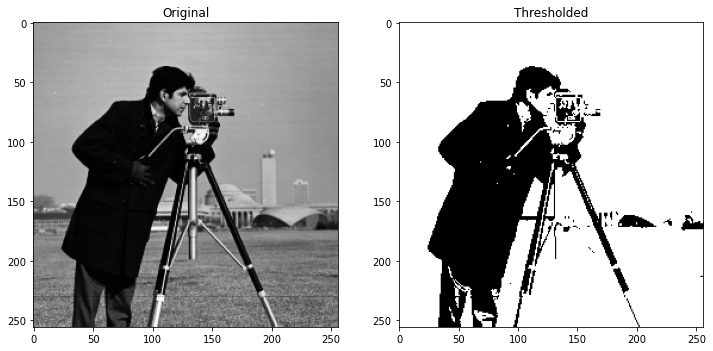

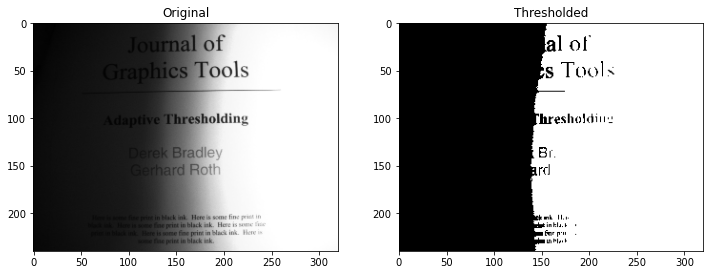

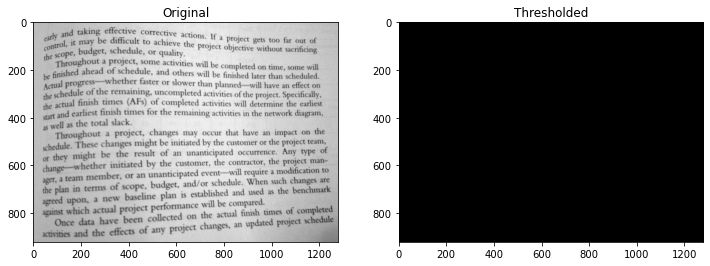

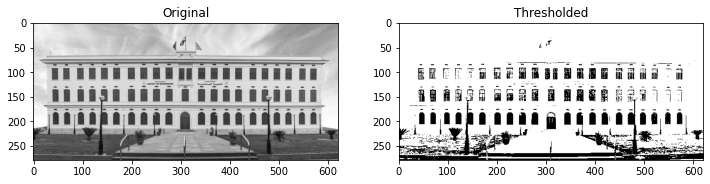

In [90]:
def getThreshold(img):
    img = (img*255).astype('uint8')
    hist, _= histogram(img, nbins=255)
    totalNofPixels = sum(hist)
    pixelsSum = sum(starmap(mul, enumerate(hist)))
    tInit = round(pixelsSum/totalNofPixels)
    tPrev = 0
    tCurrent = tInit
    while abs(tPrev-tCurrent) >2:
        tPrev = tCurrent
        low = hist[range(0,tPrev+1)]
        high = hist[range(tPrev,hist.shape[0]-1)]
        lowAvg = sum(starmap(mul, enumerate(low))) / sum(low)
        highAvg = sum(starmap(mul, enumerate(high))) / sum(high)
        tCurrent = round((lowAvg + highAvg)/2)
    return tCurrent
images = ["cameraman.png", "book.png", "book1.png", "cufe.png"]
for img in images:
    image = []
    imageToThresh = []
    if img == "cameraman.png" or img == "book.png":
        image = rgb2gray(io.imread(img))
        imageToThresh = image
    else:
        image = rgb2gray(io.imread(img)[:,:,:3])
        imageToThresh = (image*255).astype('uint8')
    thresholded = imageToThresh > getThreshold(image)
    show_images([image, thresholded], ["Original", "Thresholded"])
    

<ipython-input-96-078e8474ea94>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image = rgb2gray(io.imread("book.png"))


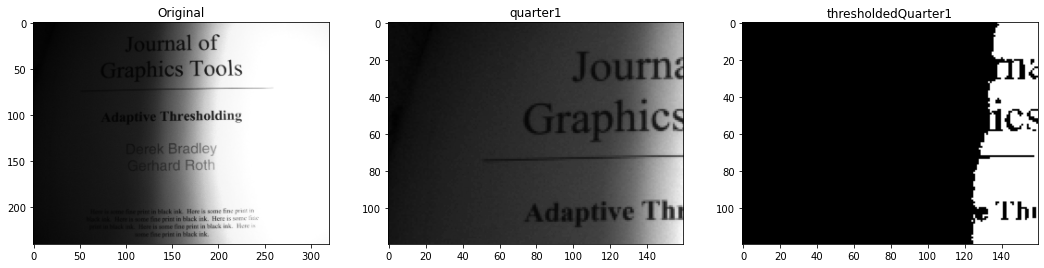

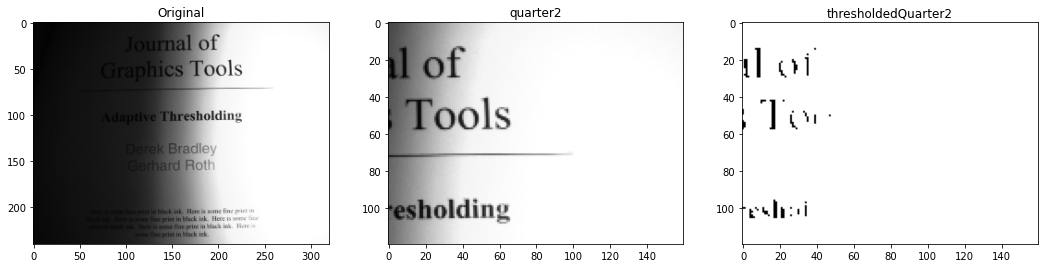

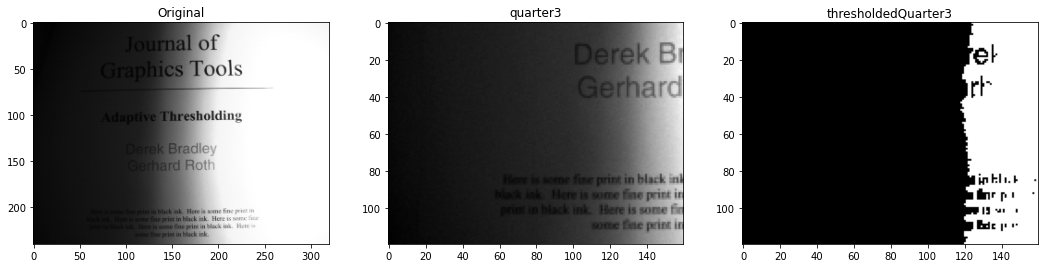

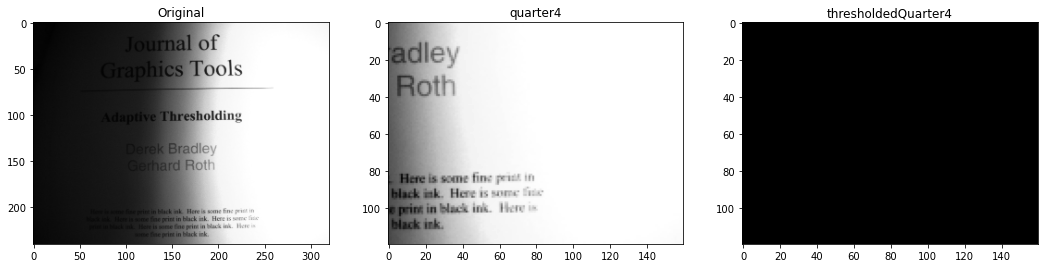

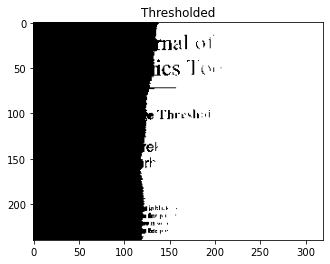

In [96]:
image = rgb2gray(io.imread("book.png"))
x, y = image.shape
quarter1 = image[0:x//2,0:y//2]
quarter2 = image[0:x//2,y//2:y]
quarter3 = image[x//2:x,0:y//2]
quarter4 = image[x//2:x,y//2:y]

thresholdedQuarter1 = quarter1 > getThreshold(quarter1)
thresholdedQuarter2 = quarter2 > getThreshold(quarter2)
thresholdedQuarter3 = quarter3 > getThreshold(quarter3)
thresholdedQuarter4 = quarter4 > getThreshold(quarter4)
show_images([image, quarter1, thresholdedQuarter1], ["Original", "quarter1", "thresholdedQuarter1"])
show_images([image, quarter2, thresholdedQuarter2], ["Original", "quarter2", "thresholdedQuarter2"])
show_images([image, quarter3, thresholdedQuarter3], ["Original", "quarter3", "thresholdedQuarter3"])
show_images([image, quarter4, thresholdedQuarter4], ["Original", "quarter4", "thresholdedQuarter4"])
newImage = np.vstack([np.hstack([thresholdedQuarter1, thresholdedQuarter2]), np.hstack([thresholdedQuarter3, thresholdedQuarter4])])
show_images([newImage], ["Thresholded"])